<a href="https://colab.research.google.com/github/parksanghan/machine_learning_Deep_learning/blob/main/ai_chapter_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

텐서


In [1]:
import tensorflow as tf
x = tf.ones(shape=(2,3))
print(x)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [2]:
x


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
x = tf.random.normal(shape=(3,1), mean= 0 , stddev =1)
print(x)

tf.Tensor(
[[-0.67973423]
 [ 2.1614645 ]
 [-0.98275703]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3,1) , minval = 0 , maxval = 1)
print(x)

tf.Tensor(
[[0.13610792]
 [0.6888267 ]
 [0.4265145 ]], shape=(3, 1), dtype=float32)


In [7]:
import numpy as np
x = np.ones(shape=(2,2))


In [8]:
x

array([[1., 1.],
       [1., 1.]])

In [9]:
x[0][0]= 0

In [13]:
x
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [15]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.44453993],
       [-1.3072736 ],
       [-0.03625145]], dtype=float32)>


In [17]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [18]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [19]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [20]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [24]:
v.assign_sub(tf.constant([[3.0], [4.0], [5.0]]))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[-2.],
       [-3.],
       [-4.]], dtype=float32)>

In [25]:
a = tf.ones((2,2))
b = tf.square(a) # 제곱
c= tf.sqrt(a) # 제 곱
d =  b+c
e = tf.matmul(a,b)
e *= d

In [26]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [27]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
  print(result)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [28]:
input_const = tf.constant(3.) #상수는 연산을 기록하지 않아 이텐서는 기본적으로 추적되지 않습니다.
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [32]:
import tensorflow as tf

input_var = tf.Variable(3.0)  # 이 변수는 자동으로 추적됨
input_const = tf.constant(4.0)  # 이 텐서는 기본적으로 추적되지 않음

with tf.GradientTape() as tape:
    tape.watch(input_const)  # input_const를 수동으로 추적
    result = tf.square(input_var)  # result는 3.0의 제곱인 9.0

# input_var에 대한 기울기를 계산
gradient_var = tape.gradient(result, input_var)  # 기울기: 6.0
print("Gradient with respect to input_var:", gradient_var)

# input_const에 대한 기울기를 계산 (결과는 None)
gradient_const = tape.gradient(result, input_const)  # 기울기: None
print("Gradient with respect to input_const:", gradient_const)


Gradient with respect to input_var: tf.Tensor(6.0, shape=(), dtype=float32)


RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

### 그레이디언트 테이프 중첩하여 이계도 그레이디언트 계산

In [37]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [38]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=19.6>

In [39]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [40]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [41]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
# 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기 negative_samples positive_samples

In [42]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

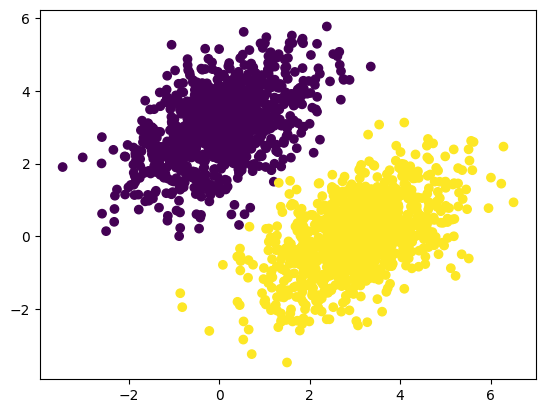

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

$ cov=\begin{bmatrix}1 & 0.5 \\ 0.5 & 1 \end{bmatrix} $

 $X$

 분산 : 1 이는 X가 평균으로 부터 얼마나 퍼져있는지
 공분산 : 0.5 변수 X가 Y간의 공분산 $Cov(X,Y)$입니다. 이는 $X$가 증가할 때 $Y$가 평균으로 부터 얼마나 퍼져있는지 말한다.

###선형 분류기의 변수 만들기

In [44]:
input_dim = 2
out_dim =1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, out_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(out_dim,)))

In [45]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.11631024],
       [0.8517215 ]], dtype=float32)>

In [46]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

###정방향 패스 함수

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

###평균 제곱 오차 손실 함수

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

### 훈련 스텝 함수


In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

### 배치 훈련 루프


In [ ]:

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [47]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [48]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.32829702],
       [0.9275857 ]], dtype=float32)>

NameError: name 'predictions' is not defined

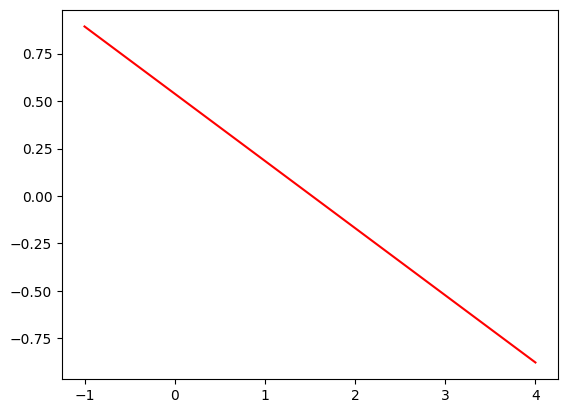

In [49]:
x = np.linspace(-1, 4, 100) # - 1 부터 4 까지 100개의 균일한 점으로 나눈 배열 생
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Layer의 서브클래스로 구현한 Dense 층

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


자동 크기 추론: 동적으로 층 만들기

In [ ]:

from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:

from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

층에서 모델로

“컴파일” 단계: 학습 과정 설정

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

### 과대적합 과소적합

훈련 초기에 최적화와 일반화는 상호 연관되어 있다. 훈련데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아진다.

과소적합

모델이 학습 데이터를 충분히 학습하지 못해, 학습 데이터와 새로운 데이터 모두에서 성능이 낮은 경우입니다. 모델이 너무 단순해서 데이터의 복잡한 패턴을 잡아내지 못할 때 발생합니다.

과대적합

모델이 학습 데이터에 지나치게 맞춰져서 학습 데이터에서는 높은 성능을 보이지만, 새로운 데이터에서는 성능이 떨어지는 경우입니다. 모델이 데이터를 너무 과도하게 학습하여 노이즈까지 학습할 때 발생합니다.

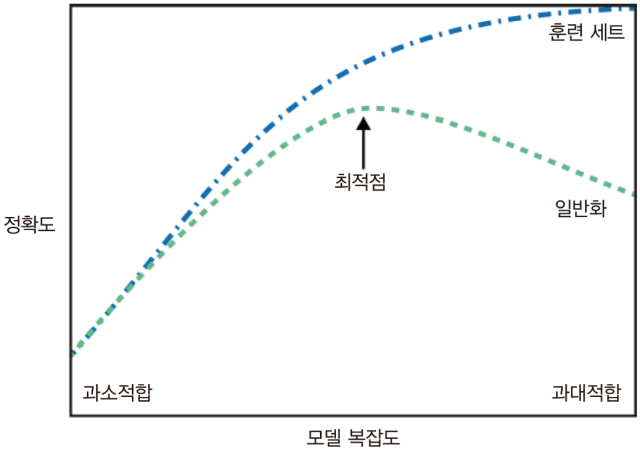

In [1]:

from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6893 - loss: 1.1038 - val_accuracy: 0.9208 - val_loss: 0.2697
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9143 - loss: 0.2834 - val_accuracy: 0.9432 - val_loss: 0.1946
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9426 - loss: 0.1851 - val_accuracy: 0.9461 - val_loss: 0.1747
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9601 - loss: 0.1282 - val_accuracy: 0.9622 - val_loss: 0.1250
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9718 - loss: 0.0912 - val_accuracy: 0.9542 - val_loss: 0.1466
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9798 - loss: 0.0647 - val_accuracy: 0.9665 - val_loss: 0.1132
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9845 - loss: 0.0493 - val_accuracy: 0.9647 - val_loss: 0.1257
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9883 - loss: 0.0378 - val_acc

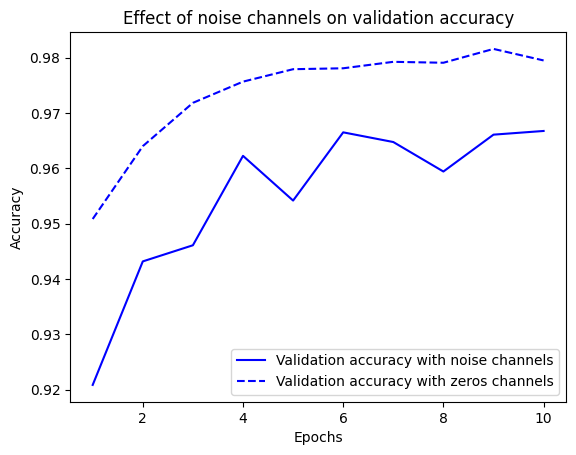

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
history_noise

NameError: name 'history_noise' is not defined

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1029 - loss: 2.3318 - val_accuracy: 0.1093 - val_loss: 2.3044
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1199 - loss: 2.2980 - val_accuracy: 0.1062 - val_loss: 2.3113
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1299 - loss: 2.2871 - val_accuracy: 0.1040 - val_loss: 2.3164
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1443 - loss: 2.2740 - val_accuracy: 0.1053 - val_loss: 2.3282
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1611 - loss: 2.2577 - val_accuracy: 0.1037 - val_loss: 2.3398
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1712 - loss: 2.2365 - val_accuracy: 0.1027 - val_loss: 2.3517
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1907 - loss: 2.2089 - val_accuracy: 0.0994 - val_loss: 2.3621
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2034 - loss: 2.1844 - val_

### 경사하강법의 핵심파라미터 튜닝

In [ ]:
(train_images, train_labels) , _=mnist.load_data()
train_images =  train_images.reshape(60000,28*28)
train_images = train_images.astype("float32")/255

model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1,),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images,train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

해당 모델은 30~40% 정도의 훈련 정확도와 검증 정확도에 빠르게 도달하지만 이를 넘어서지 못합니다.

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

모델용량 늘리기

In [ ]:
model = keras.Sequential([layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images,train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

In [11]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

NameError: name 'history_small_model' is not defined

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

###가중치 규제
모델의 과대적합을 방지하기 위한 방법중 하나이며 모델이 지나치게 복잡해지거나 훈련데이터에 대해서 치중되지 않도록 합니다.

L2 규제:  모델의 가중치의 제곱합을 손실 함수에 추가하는 방식이다.
모델의 가중치를 제곱합을 손실함수에 추가하는방식
-> 즉, 가중치가 너무 커지는것을 방지하여 모델이 복잡해지는 것을 막으며 손실 함수에 가중치의 제곱을 추가함으로서 큰 가중치를 패널티로 적용
예를들어

가중치 벡터 $w= [0.5,1.0,-0.8,0.0,2.5]$

손실함수(기본손실) = 1.0

규제강도 : 0.1

$λ∑w^2= 0.1 *(0.5^2 + 1.0^2+(-0.8)^2+2.5^2) $

따라서 L2규제가 적용된 최종손실함수는 $L2loss = originalLoss  + L2 penalty = 1.0 +  0.814 = 1.814$ 이다.



L1 규제: 모델의 가중치의 절댓값 합을 손실 함수에 추가하는 방식이다.

해당 규제는 희소성을 유도하며 일부 가중치를 0으로 만들어 불필요한 가중치가 제거된다.

$L1 penalty = λ∑∣w∣=0.1×(∣0.5∣+∣1.0∣+∣−0.8∣+∣0.0∣+∣2.5∣)$

$=0.1×(0.5+1.0+0.8+0.0+2.5)=0.1×4.8=0.48$

$L1 loss=original loss+L1 penalty=1.0+0.48=1.48$ 으로 볼 수 있다.

이를 코드에 적용시키면 아래와 같다

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
from tensorflow.keras import regularizers

model.keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation="relu", input_shape=(10000,)),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_12_reg  = model.fit(train_data, train_labels,epochs=20, batch_size = 512  , validation_split = 0.4 )


### 케라스 가중치 규제



In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l2(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)


###드롭아웃

드롭아웃이란 모델 층에서 훈련하는 동안 무작위로 층의 출력 특성을 일부 제외시킵니다. 예를 들어 어떤 입력에 대해 $[0.2,0.5,1,3,2]$ 벡터를 출력한다면  드롭아웃을 적용시 이 벡터의 일부가 무작위로 0으로 바뀝니다. 드롭아웃의 비율은 0이 될특성의 비율입니다.

보통 0.2 ~ 0.5 사이로 지정되는데 테스트 단계에서는 어떤 유닛도 드롭아웃되지 않습니다. 그 대신 층의 출력을 드롭아웃 비율에 비례해여 줄여줍니다. 훈련할 때 보다 더 많으 유닛이 활성화되기 때문입니다.

아래는 드롭아웃의 예시입니다.

$입력값 :  [1.0,0.5,-0.2]$

$가중치 : [0.5 , -0.3 , 0.8]$

드롭아웃을 적용하게 되면  입력값은 랜덤하게

확률이 0.5 이므로 드롭아웃이 적용된 마스크가 $[1,0,1]$인 경우 두번째 뉴런이 비활성화 됩니다.

$드롭아웃 후 입력값 :  [1.0*1  ,0.5*0 , 0.2*1 ] =  [1.0,0,-0.2]$
이런식입니다.

코드로 표현하면 아래와 같습니다.

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(16,activation= "relu"),
        layers.Dropout(0.5),
        layers.Dense(16,activation= "relu"),
        layers.Dropout(0.5),
        layer.Dense(1, activation="softmax")
    ]

)
model.compile(optimizer="rmsprop",loss = "binary_crossentropy", metrics=["accuracy"])
model.fit(train_data,train_labels,epochs=20,batch_size=512,validation_split=0.4)